## LAB 3 - Kanav Nanda - U20240086

### Step 1 - Importing Libraries

In [56]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA #importing PCA for the final verification step

### Step 2 - Load the given image and read it using OpenCV

In [57]:
bgr_image = cv2.imread("Lab 3 Sat Image.jpg")
rgb_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB) #converting to RGB for matplotlib

### Step 3 - Convert the image to grayscale

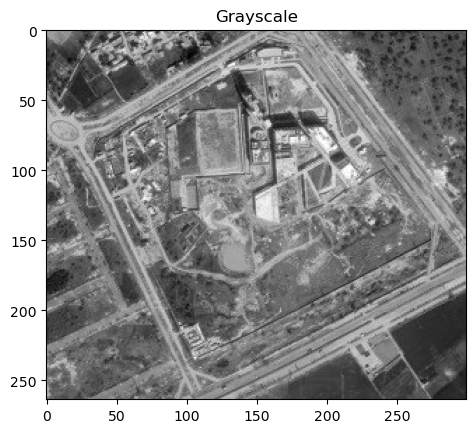

In [58]:
gray_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image,cmap="gray")
plt.title("Grayscale")
plt.show()

### Step 4 - Convert the image to double

In [59]:
image_float =  gray_image.astype(np.float64)

### Step 5 - Compute mean and subtract it

In [60]:
mean_column = np.mean(image_float)
image_mean_subtracted = image_float - mean_column

### Step 6 - Compute the covariance matrix

In [61]:
cov_matrix = np.cov(image_mean_subtracted, rowvar=False)
print(cov_matrix)
# rowvar=False because we want columns to be treated as variables

[[1518.87589296 1343.12579214 1121.83208031 ... -167.01493548
  -126.55036583 -139.92042574]
 [1343.12579214 1545.76489227 1265.9413815  ... -140.70183777
   -89.85392902  -73.36280101]
 [1121.83208031 1265.9413815  1425.59659811 ... -144.06704401
   -86.40752103  -38.05082671]
 ...
 [-167.01493548 -140.70183777 -144.06704401 ... 1254.67990264
  1140.29068729 1075.81819622]
 [-126.55036583  -89.85392902  -86.40752103 ... 1140.29068729
  1184.58519127 1148.42033932]
 [-139.92042574  -73.36280101  -38.05082671 ... 1075.81819622
  1148.42033932 1233.26545397]]


### Step 7 - Get eigen values and eigen vectors

In [62]:
eigen_values,eigen_vectors = np.linalg.eig(cov_matrix)
print(f"Eigen values = {eigen_values}, Eigen vectors = {eigen_values}")


Eigen values = [ 5.63289004e+04+0.00000000e+00j  3.66336539e+04+0.00000000e+00j
  2.93995464e+04+0.00000000e+00j  2.28484109e+04+0.00000000e+00j
  1.73503506e+04+0.00000000e+00j  1.60313602e+04+0.00000000e+00j
  1.31729300e+04+0.00000000e+00j  1.05588121e+04+0.00000000e+00j
  9.19035104e+03+0.00000000e+00j  8.71140978e+03+0.00000000e+00j
  6.67934731e+03+0.00000000e+00j  6.74164334e+03+0.00000000e+00j
  5.34685460e+03+0.00000000e+00j  4.76447145e+03+0.00000000e+00j
  4.48715448e+03+0.00000000e+00j  4.21512449e+03+0.00000000e+00j
  4.05751519e+03+0.00000000e+00j  3.82100882e+03+0.00000000e+00j
  3.74939836e+03+0.00000000e+00j  3.48363622e+03+0.00000000e+00j
  3.25225201e+03+0.00000000e+00j  2.93151637e+03+0.00000000e+00j
  2.85263270e+03+0.00000000e+00j  2.71819045e+03+0.00000000e+00j
  2.60974048e+03+0.00000000e+00j  2.47542923e+03+0.00000000e+00j
  2.37700362e+03+0.00000000e+00j  2.36805219e+03+0.00000000e+00j
  2.20556054e+03+0.00000000e+00j  2.10396637e+03+0.00000000e+00j
  2.004873

### Step 8 - Sort eigen vectors by eigen values

In [63]:
sorted_indice = np.argsort(eigen_values)[::-1] #sorting in descending order
sorted_eigen_values = eigen_values[sorted_indice]
sorted_eigen_vectors = eigen_vectors[:, sorted_indice]

### Step 9 - Define the number of principal components to keep

In [64]:
num_components = [10, 20, 30, 40, 50, 60, 91, 300] #list to check variations

### Step 10 - Reconstruct and display output for each component

[[ 0.01647839+0.j          0.01138594+0.j          0.10164021+0.j
  ...  0.00052353-0.00989721j  0.01175113+0.j
  -0.04529125+0.j        ]
 [ 0.02095799+0.j          0.01099672+0.j          0.11954056+0.j
  ...  0.04887471+0.00629714j -0.02341898+0.j
   0.01786869+0.j        ]
 [ 0.03128681+0.j          0.02936174+0.j          0.11911536+0.j
  ... -0.04905657-0.0196253j   0.02252907+0.j
  -0.02887743+0.j        ]
 ...
 [ 0.07043148+0.j         -0.06396708+0.j         -0.05643741+0.j
  ... -0.03155584-0.10228452j -0.1727706 +0.j
   0.17527025+0.j        ]
 [ 0.07278775+0.j         -0.05577649+0.j         -0.05239857+0.j
  ...  0.11156799-0.05489349j -0.01406817+0.j
  -0.05649608+0.j        ]
 [ 0.07435761+0.j         -0.05589151+0.j         -0.04344181+0.j
  ... -0.02222764+0.02235563j -0.07958797+0.j
   0.06610688+0.j        ]]
[[-279.65991745+0.j          163.42533113+0.j
  -126.17036489+0.j         ...   -2.90922202-1.01635077j
    -4.04954908+0.j            6.01424851+0.j        ]
 

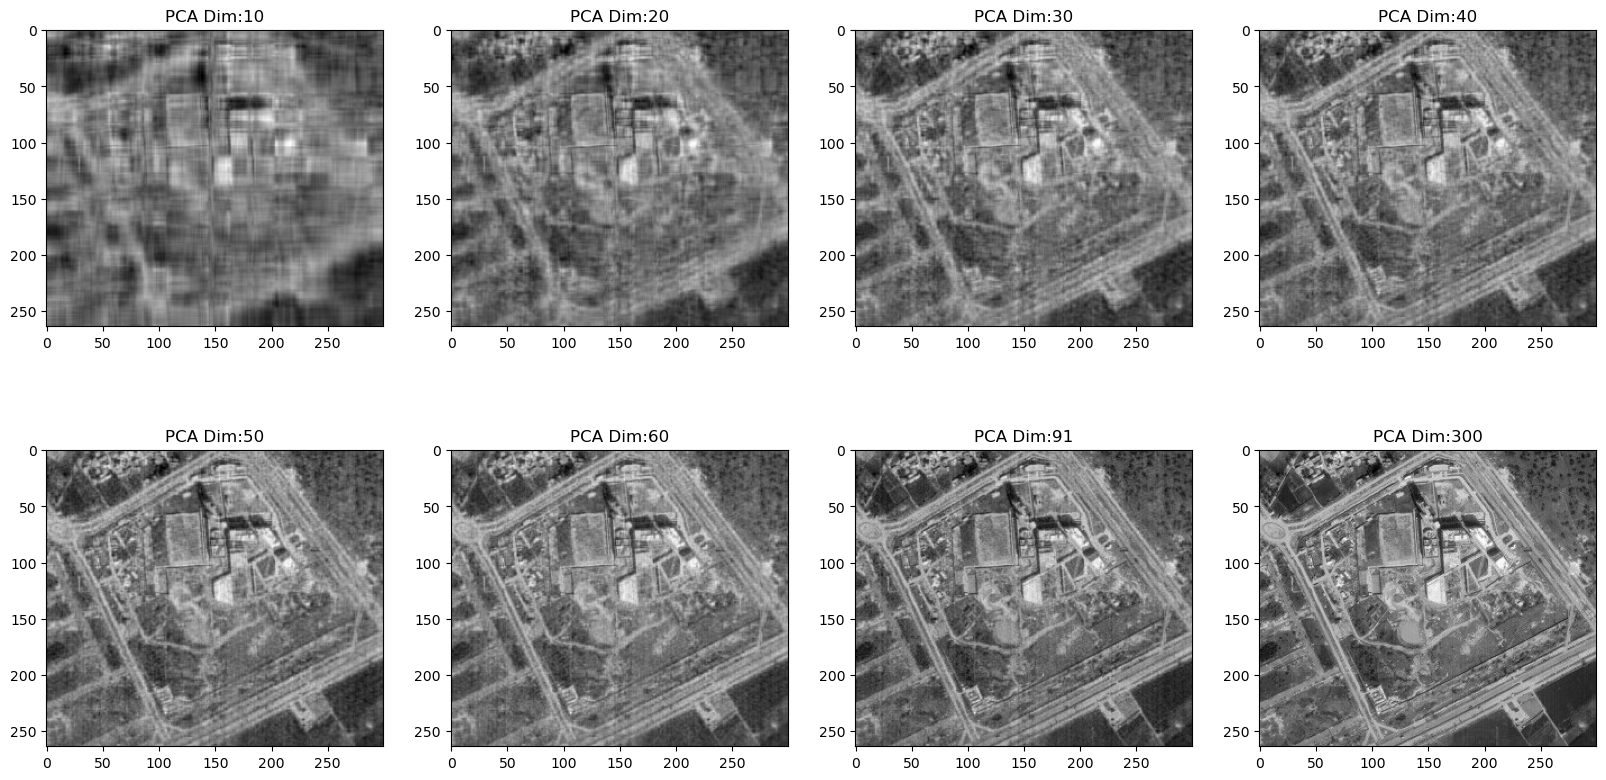

In [65]:
output_images = []
plt.figure(figsize=(20, 10))
plot_index = 1
for n in num_components:
    #Take N number of components
    selected_vectors = sorted_eigen_vectors[:,:n]
    #Project the data onto selected components
    projected_data = np.dot(image_mean_subtracted,selected_vectors)
    #Reconstruct the image
    reconstructed_image = np.dot(projected_data,selected_vectors.T) + mean_column
    #displaying the results
    plt.subplot(2,4,plot_index)
    plt.imshow(reconstructed_image.real,cmap="gray") #taking real part
    plt.title(f"PCA Dim:{n}")
    plot_index = plot_index + 1 
print(selected_vectors)
print(projected_data)
print(reconstructed_image)

### Step 12 - Using PCA function to check variance

In [66]:
pca_check = PCA(n_components=91)
pca_check.fit(image_float)
explained_variance = np.sum(pca_check.explained_variance_ratio_)
print(explained_variance)

0.9505786075919024


## Questions

##### • Q1: What is the difference between PCA and Feature Selection?

In feature selection, we select a subset of the original features and discard the rest. With PCA, we create new features by combining the original features into a linear combination, preserving the variance within data.

##### • Q2: Why do we standardize features before applying PCA?

Ans - PCA is sensitive to the scale of the features used in the dataset. Without standardization, variables with larger scales will dominate the principal components, making the results biased.

##### • Q3: What is the importance of Covariance Matrix in PCA?

Ans - The covariance matrix helps us understand how variables in the input data vary from the mean with respect to each other. It is used for calculating the eigenvalues and eigenvectors, which are very necessary for determining the principal components.

##### • Q4: What are some limitations of PCA?

Ans - PCA assumes a linear relationship between features, so it may fail to capture complex non linear patterns. It is also sensitive to outliers in the data, which can skew the results.

##### • Q5: How can we figure out the importance of individual PCs in PCA?

Ans - The importance of individual PCs is determined by their corresponding eigenvalues. Higher the eigen value more will be the variance in the data.

## THANK-YOU!